In [9]:
from common import *

In [20]:
def gen_data():
    for size in ['100', '200', '300', '400', '500', 'All']:
        for classifier in ['DL (Drift)', 'Statistical']:
            respath = ROC_PATH / classifier.split()[0] / 'exp01'
            if classifier.startswith('DL'):
                respath = respath / 'drift'
            item = pd.read_csv(respath / f'subsampled_ROC_{size}.txt', sep=' ', names=['TPR', 'FPR'])
            item['Classifier'] = classifier
            item['Num observations'] = size
            yield item

data = pd.concat(gen_data()).reset_index(drop=True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `exp1_baseline-crop.pdf'.


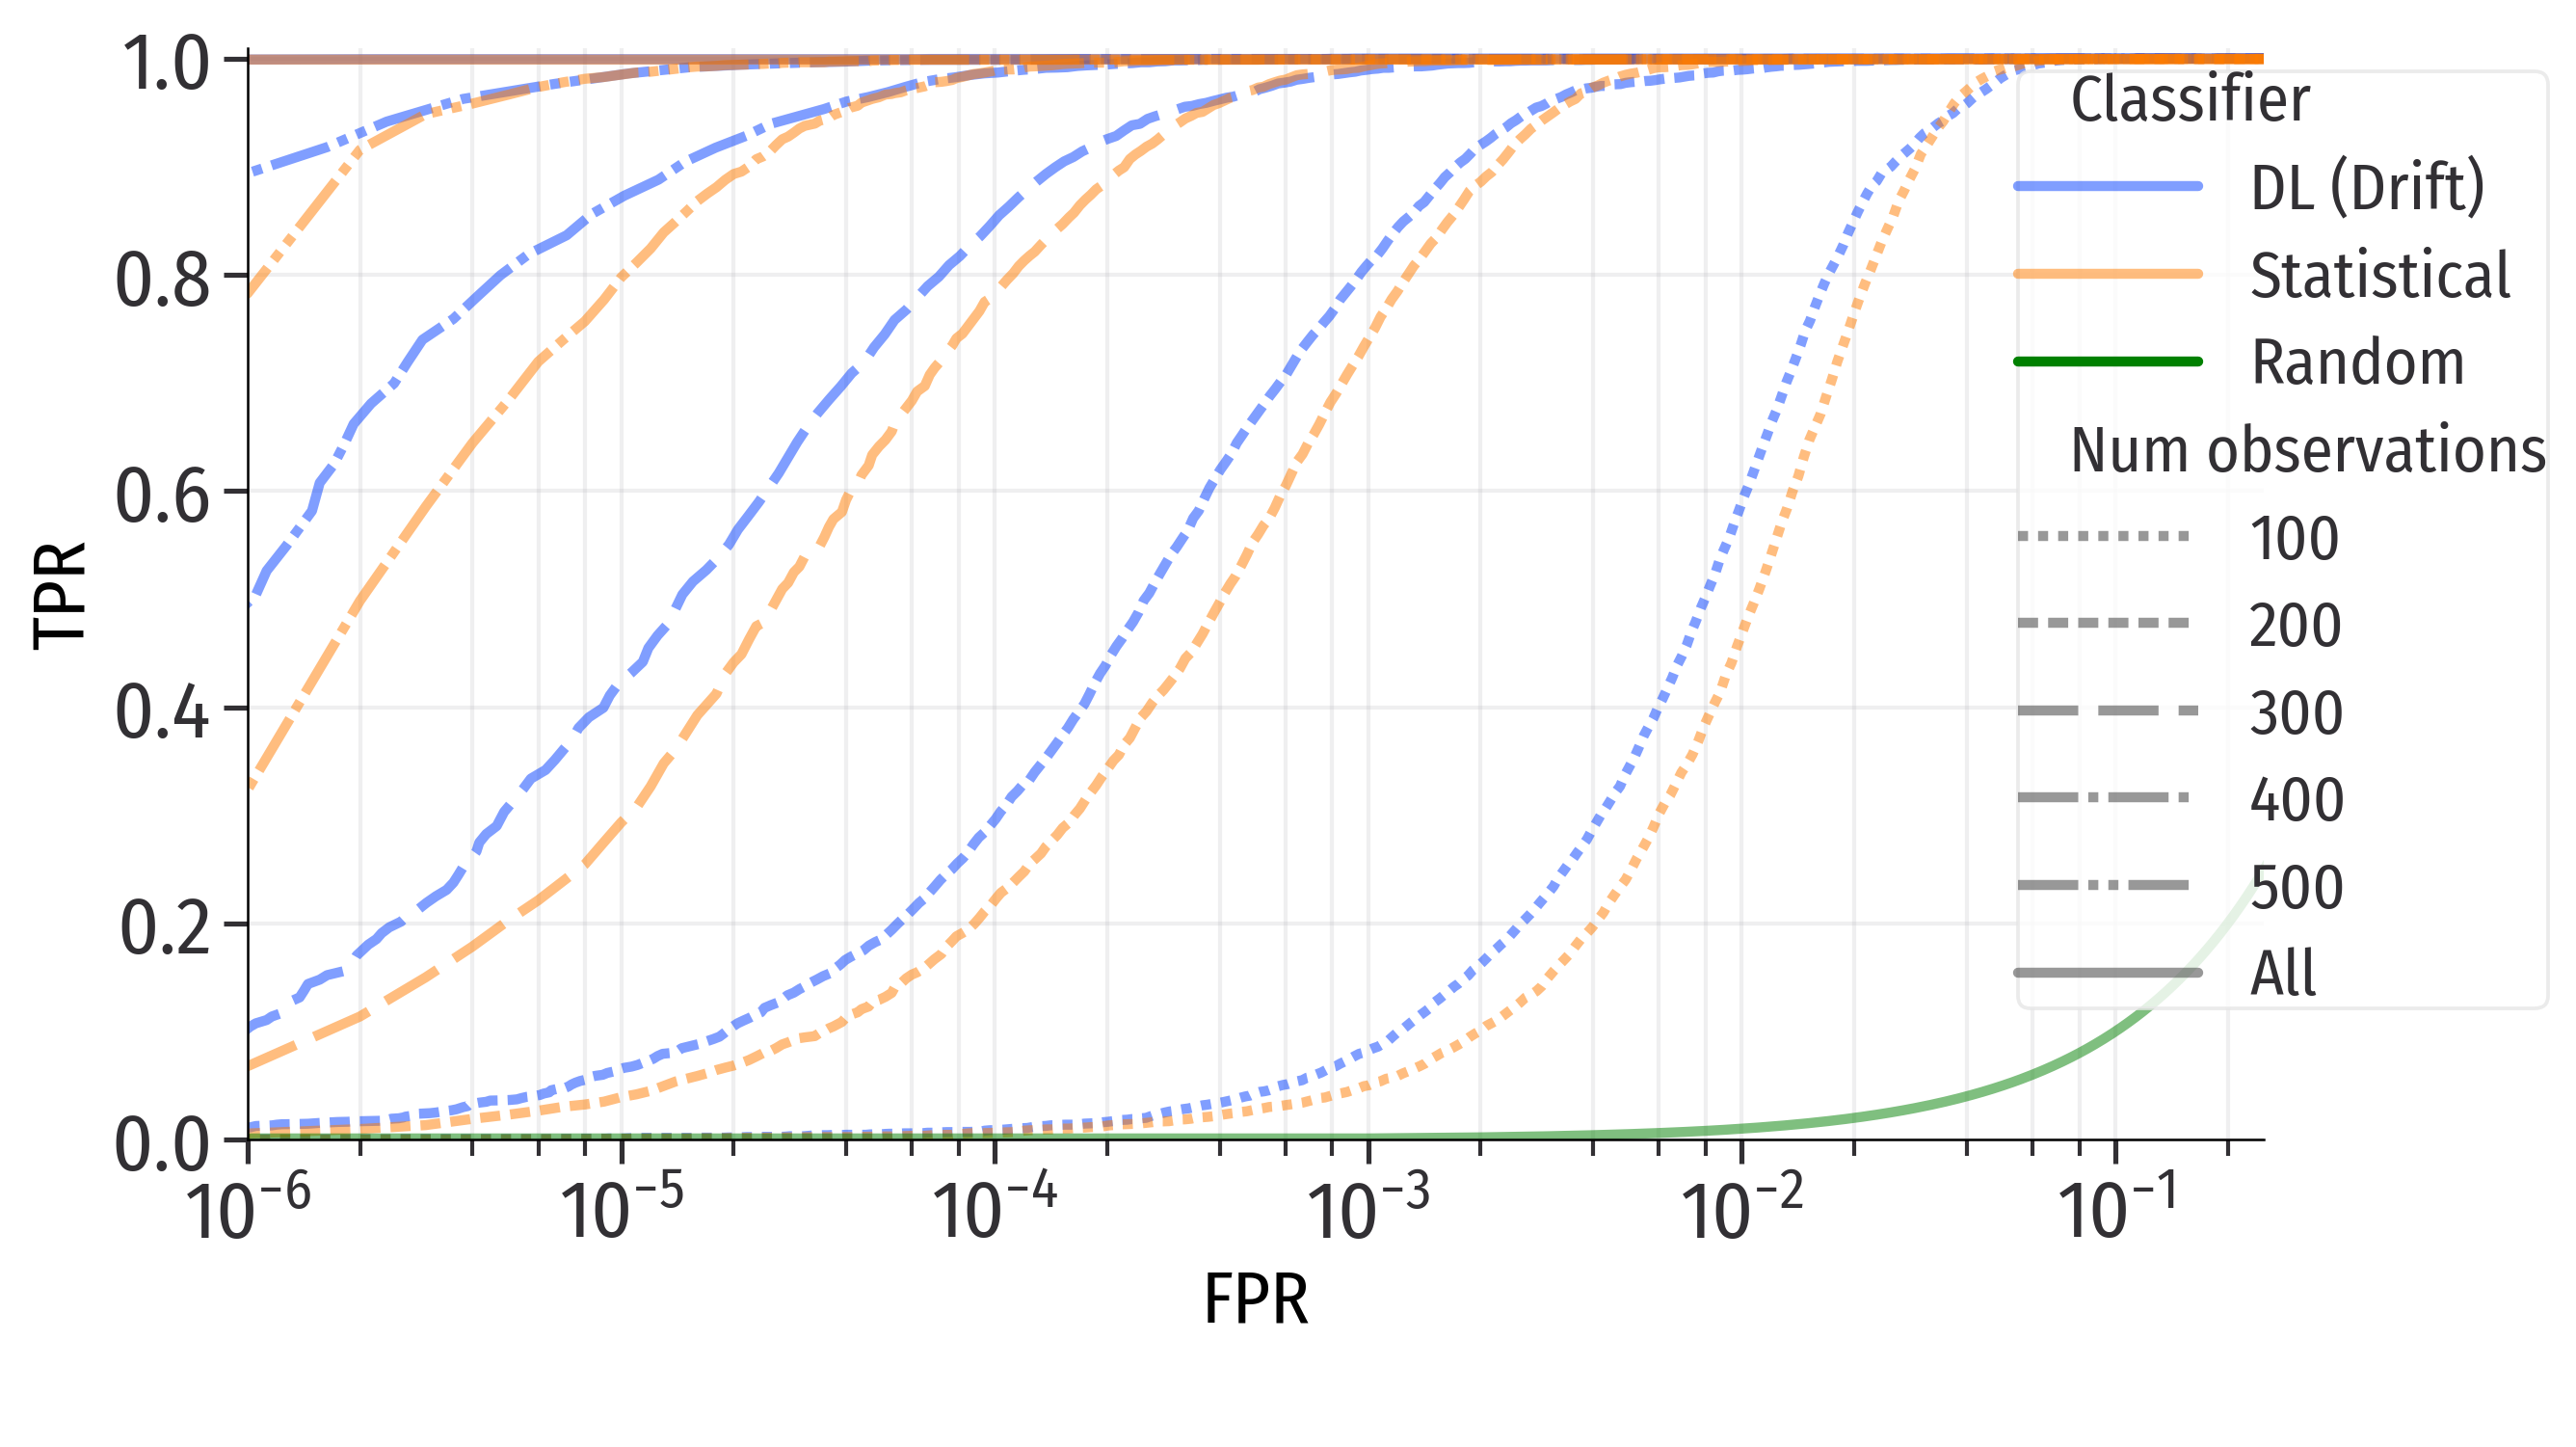

In [21]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)


g = sns.lineplot(data=data, x='FPR', y='TPR', style='Num observations', dashes=dashes_all,
                 hue='Classifier', legend='full', ci=None, palette='bright')

plot_random_classifier(g)
set_log_scale(g)

# custom legends
handles, labels = g.get_legend_handles_labels()
handles.insert(3, Line2D([0],[0], color="green",))
labels.insert(3, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.878, 0.978),
                         frameon=True,
                         loc='upper left',
                         borderpad=0, ncol=1)

# shift legend titles to the left
for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[4].get_children()[0].set_width(0)

save_fig('exp1_baseline')